# "What Sentiment Analysis Can Reveal About Common Speech Patterns"
> "Digital Humanities 140 Coding for Humanities with Professor Winjum at UCLA Winter 2022" <br><br> 3/14/2022 | Crystal Huynh, Larry Qu, Nelson Truong

- toc:true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]

### Introduction

#### Project Overview
This project analyzes the sentiment of a movie reviews dataset using Python through Jupyter Notebooks. 

#### Research Question: What common speech patterns can be found in positive and negative commentary?
Our group wanted to explore how people tend to speak when talking in an extremely positive and negative manner, especially in the context of movie reviews. Are there specific words that are frequently used when speaking in a positive sentiment versus a negative one? How often do those words show up in speech? How polarizing are these frequently used words? Do people tend to speak more when they are feeling positive or negative about something? This is the first step that we want to take when analyzing the speech patterns of movie reviews.

#### Why It Matters
With this information, we can later see whether these patterns match typical human behavior/speech, or if they are more specific in an online, more anonymous environment. We can use our findings to potentially see how polarizing these spaces are and how they affect our society in the long run as this type of analysis can also be used on things like social media comments and news articles where commentary can be even more polarizing. As we explore speech patterns in settings outside of normal, in person conversation, we can get a better idea of how people truly think and feel in certain environments or how people will think and feel given what we already know. 

### Methods

#### Data Source
[IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

[More Dataset Information](http://ai.stanford.edu/~amaas/data/sentiment/)

We are using the IMDB Dataset of 50K Movie Reviews Large Movie Review Dataset from kaggle which contains 50K movie reviews. This dataset can be used for binary sentiment classification as it contains highly polar positive and negative movie reviews for training and testing.

The dataset contains two columns, one which contains the movie review text and the other with its corresponding sentiment categorization of positive or negative. Both the review and sentiment columns are object data types which represent strings.

We also need to acknowledge the shortcomings of our dataset. Although there is not much information on where the reviews are from, we can assume the reviews cover multiple movies. With that being said, we also do not know what time period these reviews are from, the criteria for being described as "highly polar", or the backgrounds of the people who made these reviews. The context in which these reviews were made would have provided more insight into common behavioral patterns.  

[Negative Words](https://gist.github.com/mkulakowski2/4289441)

[Positive Words](https://gist.github.com/mkulakowski2/4289437)

In order to identify the positive and negative words, we can easily scan the web for premade datasets. These two shown above are datasets containing negative and positive words, respectively, that we can use to analyze our movie reviews with. These datasets may help us recognize whether a review is actually negative/positive based on the words used, the most common words used in a negative/positive statement, how the context matters when using negative/positive words, and other speech patterns.

#### Project Scope
The intended analysis is to see what are the common "positive" and "negative" words being used and how often they are used. The resulting visualizations for this would probably be something like a bar chart highlighting the ten most common "positive" and "negative" words and how often they appear in the dataset. We can also how long "positive" reviews are compared to "negative" reviews by checking the word count for each review and plotting the total word count frequency in a separate bar chart. Another analysis we could do is categorize common "positive" and "negative" words to see how polarizing they really are and plot this on another bar chart to visualize the scale of how positive "positive" reviews are and how negative "negative" reviews are.

#### Analytical Process
We will first start by exploring our dataset as a whole to better understand how we can utilize the data we have to answer our research question. We know that the dataset contains both positive and negative reviews, so we will also explore the positive and negative reviews separately. We'll conduct a word frequency analysis to see what kinds of words are being used in a negative/positive context. Within our word frequency analysis, we'll also take a look at the sentiment of each word to understand the vocabulary being used and how they may affect the overall review. When looking at positive and negative reviews as a whole, we'll calculate a sentiment score on each review to compare the score with the original sentiment categorization to understand the accuracy of our analysis. We'll also calculate the average positive and negative review sentiment scores and compare them with each other. Lastly, we'll look into how the length of the reviews affect the strength of the review's sentiment.

#### Expected Insights
We expect to see more polarizing "positive" and "negative" reviews to be lengthier in word count as people tend to speak more than they are feeling extremely "positive" or "negative" which is typical in normal, everyday, real life behavior. However, many people tend to not show their true thoughts and feelings when speaking in public, so perhaps in spaces like movie reviews, people's wording may be more polarizing than if they were to be giving the review in person. In other words, their online, anonymous reviews may be a lot more emotional and biased than what people would typically say aloud. We might see that although online commentary may reflect human behavior in that it represents what people actually are thinking and feeling, it may not be representative of what people would normally say to others. However, organizations can use these findings to gauge a more truthful reaction from the public for their respective initiatives and campaigns to see what they need to improve upon in order to generate a positive response.

### Results 

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import vader
nltk.download('vader_lexicon')
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Data Exploration

In this section, we will be taking a closer look into our dataset to better understand the information it provides and how we can utilize it in our analysis to answer our research question.

In [2]:
#turn the csv file into a dataframe
imdb_df = pd.read_csv('IMDB Dataset.csv')
imdb_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
# summary information about the dataframe
imdb_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
# how many reviews are labeled positive vs. negative
imdb_df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Our dataset contains a column of movie reviews and a column of their respective sentiment. There are 50,000 reviews total and half of them are labeled as positive reviews and the other half as negative reviews.

#### Overall Word Frequency

Now that we have a better idea of our dataset in that it contains reviews labeled as positive or negative and that there are an equal amount of each, we can separate the two and conduct more in depth exploratory analysis. By taking a closer look at the positive and negative reviews separately, we will be able to set the foundation for our formal analysis. Let's start by looking at word frequency.

In [5]:
positiveText = ""
negativeText = ""


for i in range(len(imdb_df['review'])):
    if imdb_df['sentiment'][i] == "positive":
        #positiveReviews.append(imdb_df['review'][i])
        positiveText += " " + imdb_df['review'][i].lower()
    else:
        #negativeReviews.append(imdb_df['review'][i])
        negativeText += " " + imdb_df['review'][i].lower()
        
myStopWords = list(punctuation) + stopwords.words('english')

In [6]:
#tokenize the reviews
words = word_tokenize(positiveText)

#remove the stopwords
pos_words = [w for w in words if w not in myStopWords]

print("30 most common words in positive reviews")

tmcPos = []
freq = FreqDist(pos_words)
for j in sorted(freq, key=freq.get, reverse=True)[:30]:
    print(j,freq[j])
    tmcPos.append(j)
    
positiveFreq = freq

30 most common words in positive reviews
br 97954
's 63203
film 40765
movie 36706
'' 32187
`` 31366
n't 26588
one 26537
like 17231
good 14492
great 12811
story 12531
see 11978
time 11867
would 11251
well 11230
also 10727
really 10713
even 9575
much 9067
first 8979
people 8609
love 8455
best 8350
get 8206
... 7940
way 7619
many 7597
life 7526
films 7439


In [7]:
#tokenize the reviews
words = word_tokenize(negativeText)

#remove the stopwords
neg_words = [w for w in words if w not in myStopWords]
        
print("30 most common words in negative reviews")

tmcNeg = []

negfreq = FreqDist(neg_words)
for j in sorted(negfreq, key=negfreq.get, reverse=True)[:30]:
    print(j,negfreq[j])
    tmcNeg.append(j)

30 most common words in negative reviews
br 103997
's 58927
movie 48364
n't 39659
film 36154
`` 34313
'' 34251
one 25291
like 21952
would 15224
even 15205
good 14275
bad 14223
really 12311
... 11805
time 11614
could 11342
see 10660
get 10058
much 9953
story 9810
people 9353
make 9010
made 8416
first 8221
movies 7990
acting 7904
plot 7887
well 7811
way 7503


In [8]:
onlyPositive = []
onlyNegative = []
both = set()
for myind in range(30):
    if tmcNeg[myind] not in tmcPos:
        onlyNegative.append(tmcNeg[myind])
    elif tmcPos[myind] not in tmcNeg:
        onlyPositive.append(tmcPos[myind])
    else:
        both.add(tmcPos[myind])
        both.add(tmcNeg[myind])

print("words that are only commonly used in positive reviews")
print(onlyPositive)

print("words that are only commonly used in negative reviews")
print(onlyNegative)

print("words that are commonly used in both negative and positive reviews")
print(both)

words that are only commonly used in positive reviews
['great', 'life', 'films']
words that are only commonly used in negative reviews
['bad', 'could', 'make', 'made', 'movies', 'acting', 'plot']
words that are commonly used in both negative and positive reviews
{'br', "''", "'s", 'really', 'like', 'movie', 'good', 'would', 'story', 'people', 'one', 'time', 'much', 'get', 'even', 'film', '...', 'first', 'well', '``', 'see', "n't"}


In [9]:
#most common words used for positive and negative sentiments
#positiveReviews = []
#negativeReviews = []
positiveText = ""
negativeText = ""


for i in range(len(imdb_df['review'])):
    if imdb_df['sentiment'][i] == "positive":
        #positiveReviews.append(imdb_df['review'][i])
        positiveText += " " + imdb_df['review'][i]
    else:
        #negativeReviews.append(imdb_df['review'][i])
        negativeText += " " + imdb_df['review'][i]

#print(positiveReviews[:5])

#tokenize the words
sent = sent_tokenize(positiveText)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
        
print("30 most common words in positive reviews")

tmcPos = []
freq = FreqDist(wordsNoStop)
for j in sorted(freq, key=freq.get, reverse=True)[:30]:
    print(j,freq[j])
    tmcPos.append(j)
    
positiveFreq = freq

#tokenize the words
sent = sent_tokenize(negativeText)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
        
print("30 most common words in negative reviews")

tmcNeg = []

negfreq = FreqDist(wordsNoStop)
for j in sorted(negfreq, key=negfreq.get, reverse=True)[:30]:
    print(j,negfreq[j])
    tmcNeg.append(j)

onlyPositive = []
onlyNegative = []
both = set()
for myind in range(30):
    if tmcNeg[myind] not in tmcPos:
        onlyNegative.append(tmcNeg[myind])
    elif tmcPos[myind] not in tmcNeg:
        onlyPositive.append(tmcPos[myind])
    else:
        both.add(tmcPos[myind])
        both.add(tmcNeg[myind])

print("words that are only commonly used in positive reviews")
print(onlyPositive)

print("words that are only commonly used in negative reviews")
print(onlyNegative)

print("words that are commonly used in both negative and positive reviews")
print(both)

#onlyPositive = []
#for pword in freq:
#    if pword not in negfreq:
#        onlyPositive.append((pword, freq[pword]))
        
#onlyNegative = []
#for negword in negfreq:
#    if negword not in freq:
#        onlyNegative.append((negword, freq[negword]))
        
#onlyPositive.sort(key = lambda x: -1*x[1]) 
#onlyNegative.sort(key = lambda x: -1*x[1]) 

    
#print("30 most common words in positive reviews")
#print(onlyPositive[:30])

#print("30 most common words in negative reviews")
#print(onlyNegative[:30])

KeyboardInterrupt: 

So, what do these words tell us?

Here we found the 30 most common words used in positive reviews and the 30 most common words used in negative reviews. For both, we see that our code is counting "br', "'s", and "''" which aren't words and symbols that reveal anything of use to our research. We also see more neutral words like "movie" and "film" which provide context rather than reveal much about the sentiment of the review. This tells us that we'll need to do some cleaning before we can conduct a word frequency analysis that will be meaningful, i.e. if we want to find the top 10 most commonly used words in negative/positive reviews. 

If we ignore these "words", we can take a first look at the other, more meaningful words that were listed. For positive reviews, we can see words like "like", "good", "great", "love", and "best" which are commonly associated with positive statements. For negative reviews, we only really see "bad" as a word that is commonly associated with negative statements. Interestingly enough, most of the common words found in the negative reviews are words associated with the film itself like "plot", "story", "acting", and "characters" which may be an indication that reviews tends to be more critical in a constructive sense rather than an outburst of how horrible the film was.

Many words are commonly used in both negative and positive reviews. As we can see in the output above, words such as "good", "film", "like" are commonly used in both bad and good reviews. This is because words such as "film" are purely descriptive, since all reviews will be talking about the film. Surprisingly, the word "good" shows up in negative reviews as well, although on further analysis one can deduce that this can stem from phrases such as "not very good" that are used negatively. Similarly, even though the word "like" is generally regarded as positive, it can be used negatively as well, such as in the phrase "I didn't like the film". Therefore, although many words lean towards good or bad when taken at face value, context matters a lot in their true meaning in reviews.

We also found words that are commonly used specifically in positive reviews and those include "also", "films", and "life". The words that are commonly used specifically in negatived reviews are "bad", "could", "make", "made", "movies", "plot", "acting", and "characters". Although we need context to analyze these words since on their own they do not reveal much, it is interesting to note that there are more words in the negative list, which may indicate that more negative reviews tend to be wordier or longer to produce such results. We will need to conduct more analysis to confirm this theory.

Another thing we noticed with this initial word frequency analysis was that the code itself was taking a while to run because the dataset was too large. We originally thought the dataset would be a decent sized sample of reviews, but because of the long runtime, we did not want our analysis to get stuck on a particular cell of code. As a result, we decided to use a smaller sample from the dataset and extrapolate our findings at the end of our analysis. 

Expanding upon the previous section where we looked at the 30 most frequent words in positive and negative reviews, we tried to create data visualizations to better represent these differences, using a smaller and cleaner sample of reviews. Let's first clean out the "words" and symbols that distract from our analysis.

In [10]:
# Compile first 1000 reviews into one giant string
reviews = ""
for ind in range(1000):
    reviews = reviews + " " + imdb_df["review"][ind]
    
# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize and convert all the reviews to lowercase
words = word_tokenize(reviews.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})
df

,wordlist,wordfreq
0,br,4124
1,'s,2349
2,movie,2056
3,film,1770
4,``,1285
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [11]:
# Purge weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=6)
df = df.drop(labels=26)
df

,wordlist,wordfreq
2,movie,2056
3,film,1770
7,one,1012
8,like,785
9,get,552
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [12]:
#view 30 most common words
df[:30]

,wordlist,wordfreq
2,movie,2056
3,film,1770
7,one,1012
8,like,785
9,get,552
10,time,543
11,character,532
12,would,528
13,see,528
14,good,524


Here we have cleaned our dataset so that meaningless letters and symbols will no longer be included in our word frequency analysis. There may be more odd words, but we have cleaned enough so that our smaller sample of data will provide meaningful results. Let's continue with our exploratory analysis on word frequency.

In [13]:
# Mean
df['wordfreq'].mean()

6.483727970591415

In [14]:
# which words have a word freq of 6 and 7
mean6 = df[df['wordfreq'] == 6] 
mean6[:10]

,wordlist,wordfreq
2821,security,6
2822,stare,6
2823,performed,6
2824,terribly,6
2825,grown,6
2826,love.,6
2827,meaningless,6
2828,mattei,6
2829,vivid,6
2830,loneliness,6


In [15]:
# which words have a word freq of 6 and 7
mean7 = df[df['wordfreq'] == 7] 
mean7[:10]

,wordlist,wordfreq
2543,sold,7
2544,johanson,7
2545,soap,7
2546,portrait,7
2547,connect,7
2548,connected,7
2549,noble,7
2550,davis,7
2551,quit,7
2552,mildly,7


In [16]:
# Median
df['wordfreq'].median()

1.0

In [17]:
# Mode
df['wordfreq'].mode()

0    1
dtype: int64

What do these values tell us?

The mean tells us that the word frequency value is on average 6.5, or since word frequency has to be a whole number, between 6 and 7. This means that the many of the words in this data frame are used a total of 6-7 times which tells us that there are some words people tend to use more often in the context of movie reviews. We can see some of these words above.

The median tells us the middle value for word frequency, and in this case it is 1.0. This tells us that we have a lot of words that are only used once throughout the whole data frame of reviews.

The mode is the most commonly seen word frequency value, and in this case, it is 1. This makes sense because of our median value that tells us there are a lot of words that only appear once. So, the median and the mode tell us that a word frequency of 1 is the most common word frequency value in our data frame of common words. 

Now that we have a better understanding of our dataset, we can begin visualizing these word frequency exploration findings using plots.

<AxesSubplot:ylabel='Frequency'>

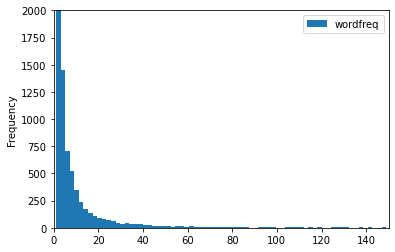

In [18]:
# Histogram of word frequency values
df.plot.hist(bins=1000, xlim=(0, 150), ylim=(0,2000))

This histogram shows the distribution of word frequency values, and we can see that most words are used less than 20 times and only a few words are used hundreds of times.

<AxesSubplot:ylabel='wordlist'>

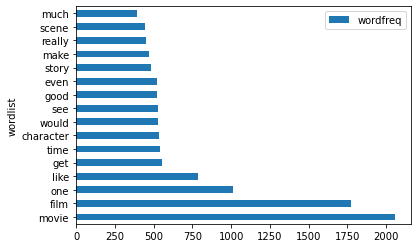

In [19]:
# Barchart of the 17 most frequent words
bar_df = df.loc[0:20, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")
#ax = bar_df.plot.bar(x='wordlist', y='wordfreq', rot=0)

We can also use a bar chart to visually compare how many times the most common words are being used in our dataset. We can see that the frequency value drastically decreases as we go down the word list and once we reach around the 500 range, the bars are more similar in length. This chart only shows the 17 most frequent words, so if we were to look at more words, we would still be able to see this same type of distribution but at a smaller frequency value. Comparing this chart with the histogram allows us to dive deeper into the word frequency distribution and see what types of words are being used at the highest frequency level.

<AxesSubplot:ylabel='wordlist'>

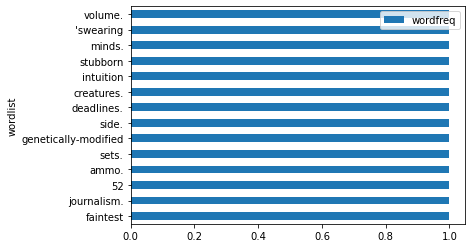

In [20]:
# Barchart of the 19 least frequent words
#this barchart isnt as helpful, should replace with something else
bar_df = df.loc[18490:, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")

# need to find all words with only a freq of 1

This bar chart differs drastically from the previous chart in that all the bars are at the same value of one. This tells us that there may be many words that are not only used just once, but a few times. What may be more meaningful when looking at the lowest word frequency level is to list out the words instead since a bar chart that lists even the 100 least frequent words may all be at the value of 1.

In [21]:
df.loc[df['wordfreq'] == 1]

,wordlist,wordfreq
8816,timid,1
8817,penitentary,1
8818,emerald,1
8819,inwards,1
8820,privacy,1
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


In [22]:
df.loc[df['wordfreq'] < 5]

,wordlist,wordfreq
3853,me.,4
3854,hearted,4
3855,experimental,4
3856,em,4
3857,muslim,4
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


Like we predicted, there are over 9,500 words that are used only once, so a bar chart would not be ideal for us to visualize the lower end of the word frequency distribution. When we take a look at the word frequency value of below 5 to gauge how large a bar chart would need to be to see more bar lengths like with the most frequent words, the number of words that would be included is too large for us to properly analyze. 

With our cleaned data frame of words, we can run code to retrieve a better list of the most commonly used words in positive and negative reviews. We'll do that in the Positive Reviews and Negative Reviews Section. Let's first do a bit more exploratory sentiment analysis to get a better sense of the dataset as a whole.

#### Overall Word Sentiment

In order to get a better gauge of the most frequently used words that will help with our sentiment analysis, we will also need to ignore words like "movie", "film", "characters", and "scene" that provide more context about the review, are common in both positive and negative reviews, and are more neutral in sentiment. These words will not reveal much about speech patterns in a positively or negatively emotional context. So, let's find the sentiment values of our most common words to differentiate neutral, positive, extremely positive, negative, and extremely negative words in our dataset.

In [23]:
# Sentiment value of each word
sia = vader.SentimentIntensityAnalyzer()
k = 0
newwordlist = []
words_sentiments = []
for index, row in df.iterrows():
    word = df["wordlist"].iloc[k]
    #print(word + "'s compound polarity score is " + str(sia.polarity_scores(word)["compound"]))
    words_sentiments.append(sia.polarity_scores(word)["compound"])
    newwordlist.append(word)
    k+=1

words_sentiment_df = pd.DataFrame({'wordlist':newwordlist, 'wordsent':words_sentiments})
words_sentiment_df[:30]

,wordlist,wordsent
0,movie,0.0000
1,film,0.0000
2,one,0.0000
3,like,0.3612
4,get,0.0000
5,time,0.0000
6,character,0.0000
7,would,0.0000
8,see,0.0000
9,good,0.4404


In [24]:
# Find the most polarizing words - negative and positive
k = 0
positive_words = []
negative_words = []
positive_word_sentiments = []
negative_word_sentiments = []
for index, row in words_sentiment_df.iterrows():
    word = words_sentiment_df["wordlist"].iloc[k]
    if words_sentiment_df["wordsent"].iloc[k] > .5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        positive_word_sentiments.append(sia.polarity_scores(word)["compound"])
        positive_words.append(word)
        #print("The most positive words are:")
    elif words_sentiment_df["wordsent"].iloc[k] < -.5:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        negative_word_sentiments.append(sia.polarity_scores(word)["compound"])
        negative_words.append(word)
        #print("The most negative words are:")
    k+=1

#print ("The positive words are:" + str(positive_words))
#print ("The negative words are:" + str(negative_words))
positive_df = pd.DataFrame({'wordlist':positive_words, 'wordsent':positive_word_sentiments})
positive_df = positive_df.sort_values(by='wordsent', ascending=False)
print ("The positive words are:")
print (positive_df[:30])
negative_df = pd.DataFrame({'wordlist':negative_words, 'wordsent':negative_word_sentiments})
negative_df = negative_df.sort_values(by='wordsent', ascending=True)
print ("The negative words are:")
print (negative_df[:30])

The positive words are:
          wordlist  wordsent
185  magnificently    0.6597
119     sweetheart    0.6486
1             best    0.6369
2             love    0.6369
29       perfectly    0.6369
19        greatest    0.6369
79         freedom    0.6369
81           love.    0.6369
146          'love    0.6369
129           glee    0.6369
102       glorious    0.6369
103          best.    0.6369
112       paradise    0.6369
121     excellence    0.6249
120         joyous    0.6249
23     masterpiece    0.6249
127    excellently    0.6249
162   masterpiece.    0.6249
180       awesome.    0.6249
206         great.    0.6249
208        superb.    0.6249
24          superb    0.6249
0            great    0.6249
21         awesome    0.6249
145   brilliantly.    0.6124
172      brightest    0.6124
55        gorgeous    0.6124
179    perfectness    0.6124
161       heavenly    0.6124
203       splendor    0.6124
The negative words are:
        wordlist  wordsent
119       rapist   -0.7096

In [25]:
# Find the extreme polarizing words - negative and positive
k = 0
max_pos_words = []
max_neg_words = []
for index, row in words_sentiment_df.iterrows():
    word = words_sentiment_df["wordlist"].iloc[k]
    if words_sentiment_df["wordsent"].iloc[k] > .7:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        max_pos_words.append(words_sentiment_df["wordlist"].iloc[k])
        #print("The most positive words are:")
    elif words_sentiment_df["wordsent"].iloc[k] < -.7:
        #print(word + "'s compound polarity score is " + df["wordsent"].iloc[k])
        max_neg_words.append(words_sentiment_df["wordlist"].iloc[k])
        #print("The most negative words are:")
    k+=1

print ("The extremely positive words are:" + str(max_pos_words))
print ("The extremely negative words are:" + str(max_neg_words))

The extremely positive words are:[]
The extremely negative words are:['rapist', 'slavery']


We can see that there are many words that are considered positive or negative based on their sentiment. The words with the highest sentiment scores are "magnificently", "sweetheart", "best", "love", and "perfectly" which mean they are the most positive words being used. The words with the lowest sentiment scores are "rapist", "slavery", "rape", "murder", and "kill" which mean they are the most negative words being used. When we compare the two lists, it seems like the negative words again are more likely describing the plot of the film rather than one's feelings about the film. The positive words are more descriptive whereas the negative words are more specific about something concrete, which may mean that when people dislike something, they will more likely talk about what it was they did not like rather than their feelings about not liking it, and be more objective. When people are happier about something, they will more likely talk about their feelings towards whatever it was that made them happy more than the thing itself.

<AxesSubplot:ylabel='Frequency'>

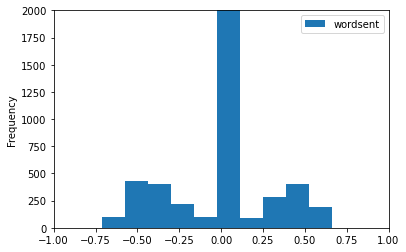

In [26]:
# Histogram of word sentiment values
words_sentiment_df.plot.hist(bins=10, xlim=(-1, 1), ylim=(0,2000))

When looking at this histogram of word sentiment distribution, most words are neutral but we can see a slight difference between the use of positive and negative words. There are stronger negative words being used and the frequency is more even around the -0.5 sentiment value than the 0.5 sentiment value. This tells us that people will use stronger negative words when talking in a negative context compared to positive words in a positive context. It also tells us that people use more neutral leaning words in positive statements, downplaying their positive emotions more compared to negative statements. Perhaps people tend to be more emotional in a negative sense. 

Now that we have a better sense of what we want to look for and the overall dataset, we can conduct more specific analysis on positive and negative reviews separately to compare and contrast the most common words being used, the average sentiment, etc.

#### Positive Reviews - Word Frequency 

In this section, we will conduct word frequency analysis on only the positive reviews to see what type of language is typically used in a positive context.

In [27]:
# Look only at positive reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "positive":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
poswordlist = []
poswordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    poswordlist.append(i)
    poswordfreq.append(freq[i])
pos_df = pd.DataFrame({'wordlist':poswordlist, 'wordfreq':poswordfreq})
pos_df

,wordlist,wordfreq
0,br,9788
1,'s,6235
2,film,4601
3,movie,4401
4,'',2898
...,...,...
30944,code-breakers,1
30945,bletchly,1
30946,emerged,1
30947,makers.,1


In [28]:
# Clean up the dataframe and remove weird words
pos_df = pos_df.drop(labels=0)
pos_df = pos_df.drop(labels=1)
pos_df = pos_df.drop(labels=4)
pos_df = pos_df.drop(labels=5)
pos_df = pos_df.drop(labels=7)
pos_df = pos_df.drop(labels=26)
pos_df = pos_df.drop(labels=31)
pos_df[:30]

,wordlist,wordfreq
2,film,4601
3,movie,4401
6,one,2718
8,like,1701
9,time,1448
10,good,1423
11,story,1372
12,character,1307
13,see,1263
14,great,1222


After cleaning out the odd words and symbols, we can see that like in our analysis on the overall dataset, the top words are more neutral and do not reveal much. However, we can see words like "like", "good", "great", "well", "love", and "best" amongst the top 30 which tells us that in addition to context words about the film, people use a variety of more positive words in a positive statement.

<AxesSubplot:ylabel='wordlist'>

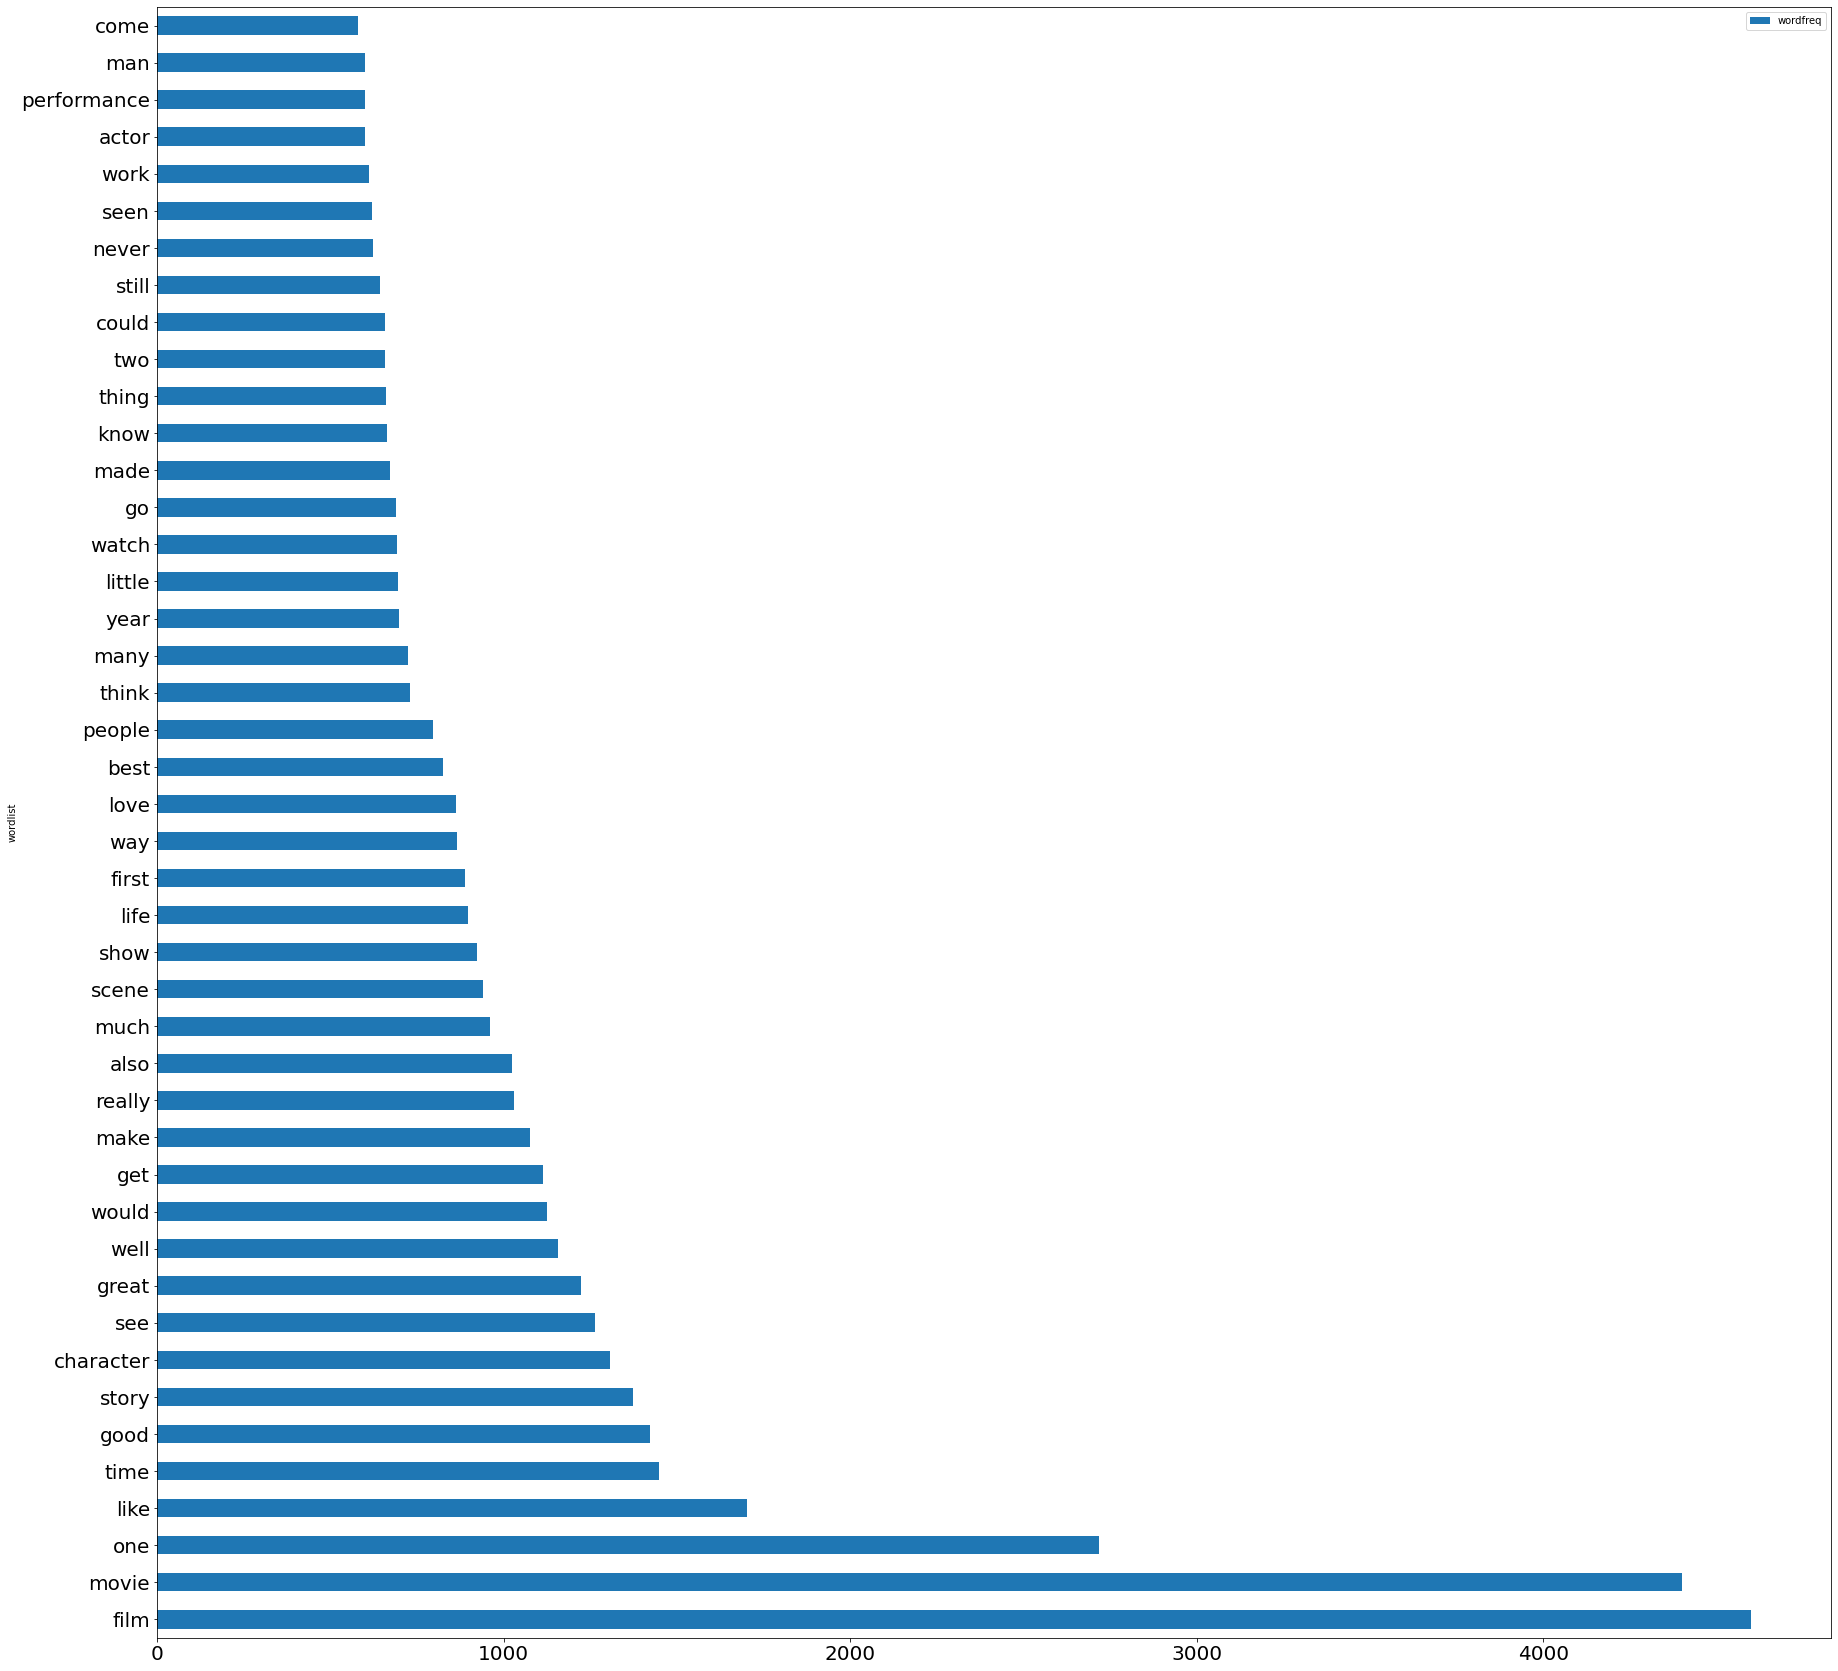

In [29]:
# Barchart
posbar_df = pos_df.loc[0:50, ["wordlist", "wordfreq"]]
posbar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)

We can also visualize the word frequency on a bar chart. Most words are around 1000 and below in frequency value which is still a significant number as it tells us that these words are usually what people say when giving a positive review. We can see there is quite a diversity in positive language within the context of movie reviews.

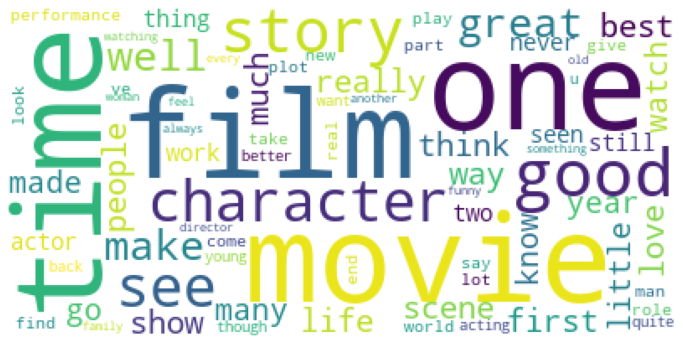

In [30]:
#generate a basic wordcloud for most frequently used positive words
from wordcloud import WordCloud
poswordfreq = pos_df["wordlist"].to_json()[:1000]
poswordfreqcloud = WordCloud(background_color="white").generate(poswordfreq)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(poswordfreqcloud)

#to remove the axis value
plt.axis("off")
plt.show()

Another way to visualize the word frequency is with a word cloud, and we created one here for the most frequently used positive words with the most frequently used words being the largest in the plot.

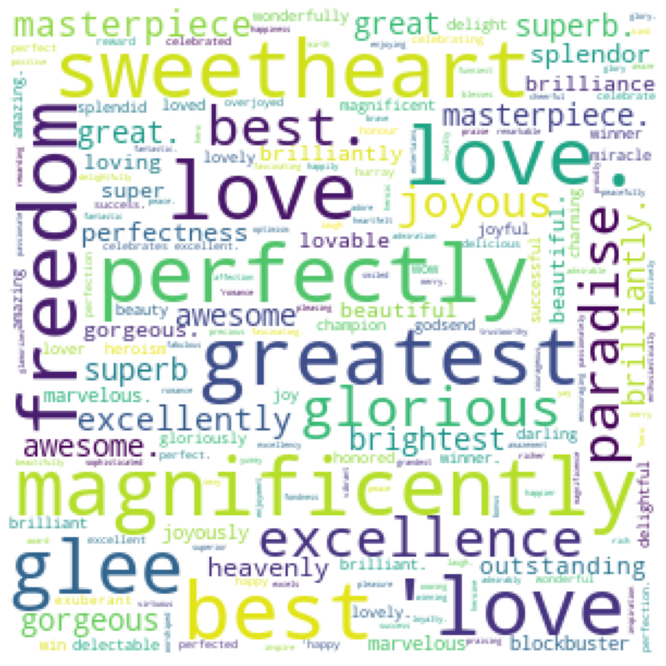

In [31]:
#generate a basic wordcloud for positive word sentiment strength
poswordsent = pd.Series(positive_df.wordsent.values,index=positive_df.wordlist).to_dict()
poswordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(poswordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(poswordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

Since there were quite a few neutral words in the word frequency list, we decided it would be more helpful for use to look at the words with the highest sentiment values or the most positive words being used in positive reviews. We can then compare these results with the word frequency analysis. Here we can see that some of the largest words in the word cloud are "magnificently", "perfectly", "greatest", "love", "best", and "sweetheart" which is similar to what we found at the start. Comparing this with the word frequency cloud, words like "best" and "love" are relatively large in both clouds, meaning that they are very positive words that are often used in positive reviews.

What does this all mean?

These results tell us that in a positive context, people do use words like "best" and "love" which are strongly positive, descriptive words. They also used these words frequently to describe either their feelings or the subject at hand.

#### Negative Reviews - Word Frequency

We can do the same analysis for negative reviews and then compare our findings.

In [32]:
# Look only at the negative reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "negative":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
negwordlist = []
negwordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    negwordlist.append(i)
    negwordfreq.append(freq[i])
neg_df = pd.DataFrame({'wordlist':negwordlist, 'wordfreq':negwordfreq})
neg_df

,wordlist,wordfreq
0,br,10836
1,'s,5831
2,movie,5726
3,film,4334
4,n't,4076
...,...,...
29968,extracted,1
29969,brutalizing,1
29970,unscarred,1
29971,mastroianni-movie,1


In [33]:
# Clean up dataframe and drop weird words
neg_df = neg_df.drop(labels=0)
neg_df = neg_df.drop(labels=1)
neg_df = neg_df.drop(labels=4)
neg_df = neg_df.drop(labels=5)
neg_df = neg_df.drop(labels=6)
neg_df = neg_df.drop(labels=19)
neg_df[:30]

,wordlist,wordfreq
2,movie,5726
3,film,4334
7,one,2584
8,like,2291
9,even,1606
10,would,1580
11,good,1508
12,bad,1484
13,character,1433
14,get,1431


After cleaning out the odd words and symbols, we can see that like in our analysis on the overall dataset, the top words are again more neutral and do not reveal much. There also are not as many negative words besides "bad", but there are many words that seem to describe the film itself which again, we found at the start of our analysis. This reinforces the idea that people do not use many descriptive words when talking about their negative feelings towards something because they will talk about the actual subject that caused their negative feelings. This also may show us that when people do start to use descriptive, negative words, they tend to be stronger in sentiment.

<AxesSubplot:ylabel='wordlist'>

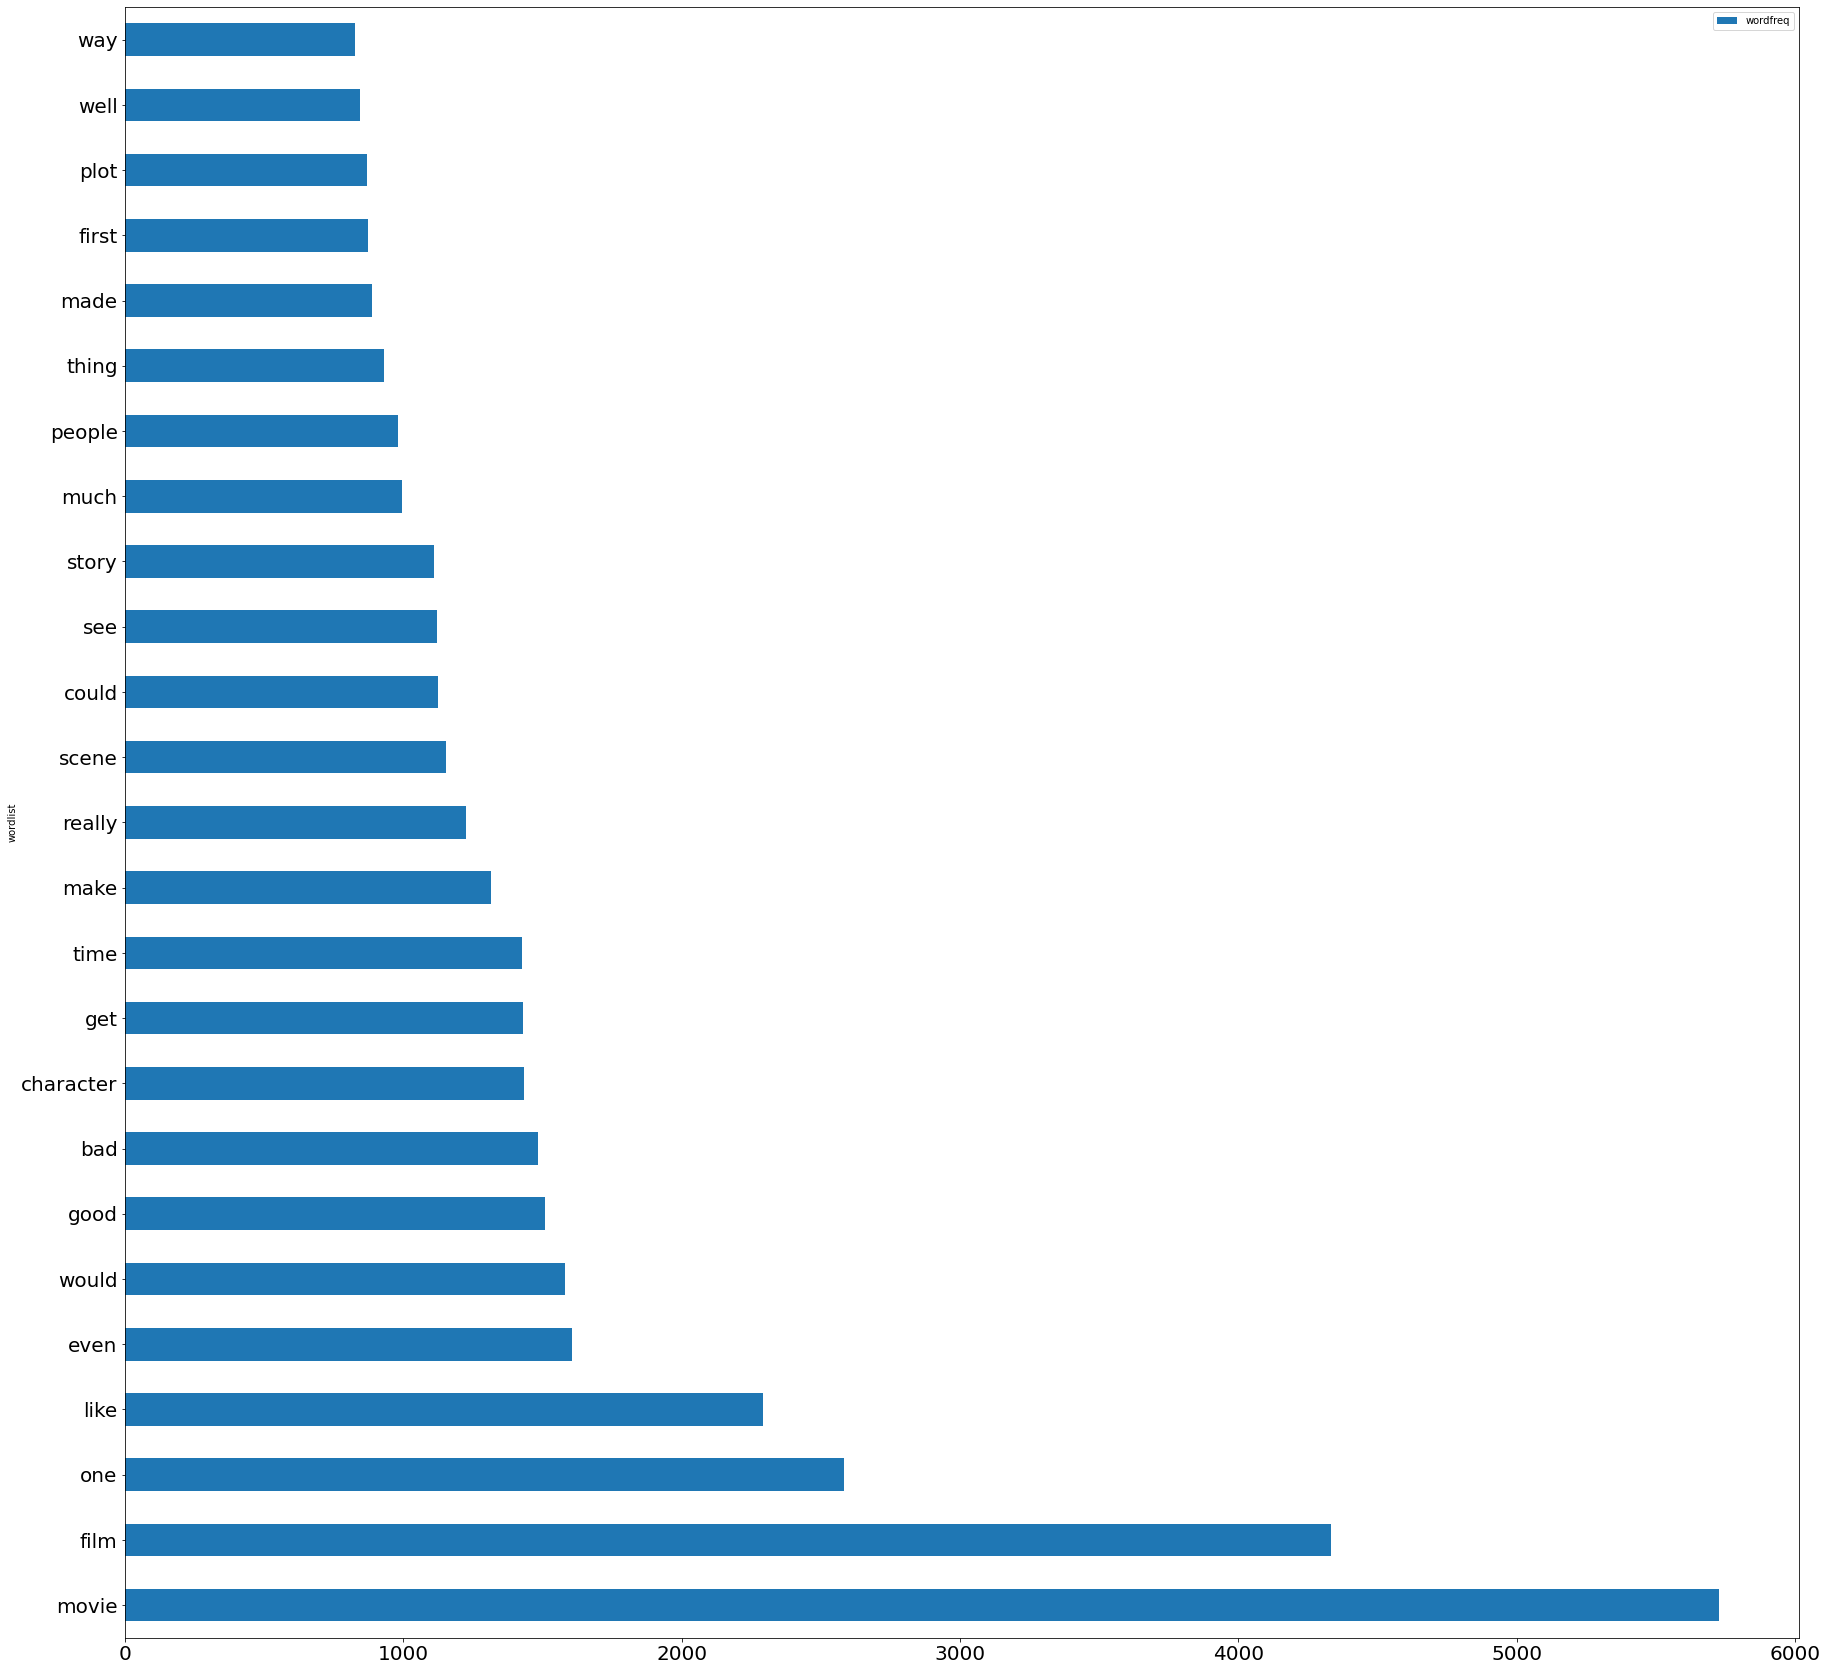

In [34]:
# Barchart
negbar_df = neg_df.loc[0:30, ["wordlist", "wordfreq"]]
negbar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)

We can visualize word frequency on a bar chart like we did with positive reviews, and we see that we get similar results in that most of the most frequently used words have a frequency value of around 1000.

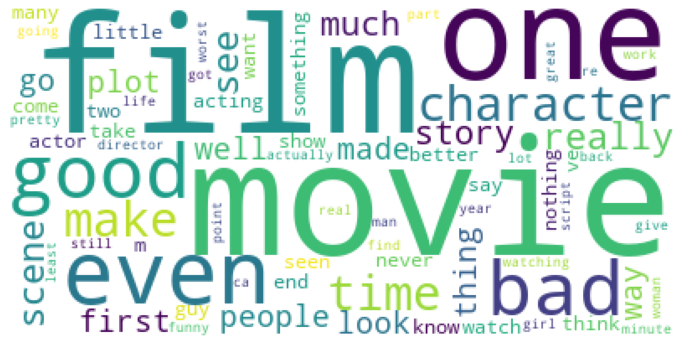

In [35]:
#generate a basic wordcloud for most frequently used negative words
from wordcloud import WordCloud
negwords = neg_df["wordlist"].to_json()[:1000]
negwordcloud = WordCloud(background_color="white").generate(negwords)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(negwordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

A word cloud also shows us the same results, where the largest words are not necessarily "negative" words, but more about the film.

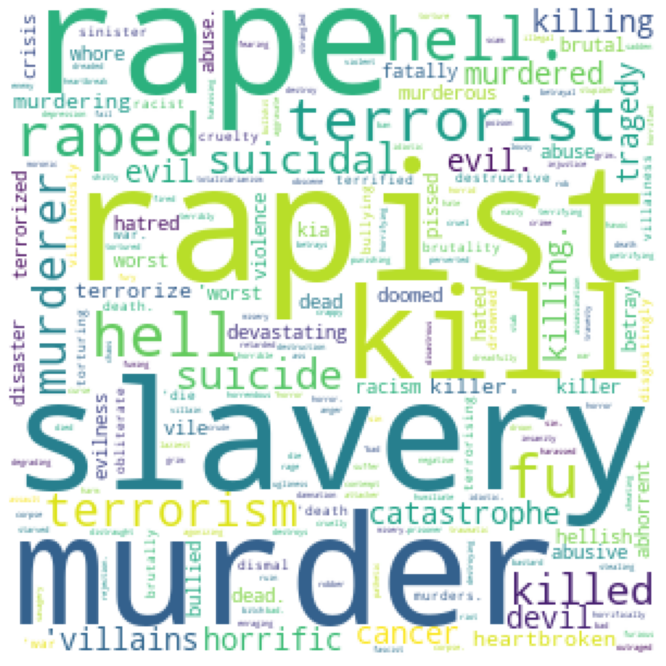

In [36]:
#generate a basic wordcloud for negative word sentiment strength
negwordsent = pd.Series((negative_df.wordsent.values*-1),index=negative_df.wordlist).to_dict()
negwordsentcloud = WordCloud(background_color='white', width = 300, height=300, margin=2).generate_from_frequencies(negwordsent)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(negwordsentcloud)

#to remove the axis value
plt.axis("off")
plt.show()

In this word cloud, some of the largest words include "rapist", "slavery", "murder", "kill", and "terrorist" which is consistent with our previous analysis. Again, these words are most likely about a film's plot rather than the reviewer's actual feelings towards the film. This tells us that the negatively strongest words being used are usually about the film and that in a negative context, people do not typically use harsh language when saying they dislike a film. However, if they did like a film, they would use positively strong words to convey their feelings.

Comparing this word cloud with the most frequently used negative words cloud, there is not as much overlap like there was with positive reviews. This may be due to the types of movies that were reviewed, given the featured words in the negative sentiment word cloud, but we do not have access to that information so we would be unable to confirm the validity of this theory.

#### Sentiment Analysis

We can conduct more in depth sentiment analysis with the whole review rather than just the sentiment of specific words to better understand how the words we analyzed in the previous sections are used in the context of a full movie review.

In [37]:
sia = vader.SentimentIntensityAnalyzer()

In [38]:
k = 0
data = []
for index, row in imdb_df.iterrows():
    if k >= 50:
        review = imdb_df["review"].iloc[k]
        print(imdb_df["sentiment"].iloc[k])
        print(sia.polarity_scores(review))
        # print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        data.append(sia.polarity_scores(review)["compound"])
        k+=1
#data[:50]

Why are some reviews interpreted as positive even though they have negative compound score and vice versa?

Certain reviews are interpreted as positive even though the sentiment value is negative or negative even though the sentiment value is positive. When looking at the polarity scores, we can see that most of the movie reviews have a high neutral score. That means that the movie reviews in this particular dataset are not very polarizing and/or may be looking at both the pros and the cons of the movie, making it more confusing for the Vader analysis to accurately determine the sentiment of the while review. We can look at one of these reviews such as the one at index 0. 

*"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."*  

This review mentions the brutality of Oz and that even though the reviewer became accustomed to it, they recognize that it is uncomfortable to watch in the beginning. As someone reading this review, we can tell that the reviewer liked the film which is why the sentiment is considered positive in the database. However, Vader sees words such as "uncomfortable", "brutality", "not", "injustice", "violence", etc. and decides that this review is leaning towards negative rather than positive. Vader is by no means a perfect algorithm and messes up when reviews are slightly ambiguous such as this one. The next cell will look at how accurate Vader was in analyzing the sentiment of all the movie reviews.

In [ ]:
# Calculate the number of true positives and true negatives in the dataframe
truths = 0
for index, row in imdb_df.iterrows():
    review = row["review"]
    compound = sia.polarity_scores(review)["compound"]
    if compound > 0 and row["sentiment"] == "positive":
        truths += 1
    if compound < 0 and row["sentiment"] == "negative":
        truths += 1
        
# Divide the number of true positives and true negatives by the size of the dataframe
print(truths/imdb_df.size)

The Vader sentiment analysis only got an accuracy of 34.799 percent against the IMDB dataset. Despite the poor accuracy, this does not mean Vader isn't a good algorithm, but that Vader is not powerful enough for this type of dataset that includes more ambiguous language. 

We can look at the accuracy of Sentiwordnet next.

In [ ]:
# Calculating overall accuracy of Sentiwordnet

from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

myStopWords = list(punctuation) + stopwords.words('english')

def naiveSentiment(review):
    reviewPolarity = 0.0
    words = [w for w in word_tokenize(review.lower()) if w not in myStopWords]
    for word in words:
        sentScore = 0.0
        if len(list(swn.senti_synsets(word))) > 0:
            for i in list(swn.senti_synsets(word)):
                if i.pos_score() > i.neg_score():
                    sentScore += i.pos_score()
                else:
                    sentScore -= i.neg_score()
            reviewPolarity += sentScore / len(list(swn.senti_synsets(word)))
    
    return reviewPolarity

truths = 0
for index, row in imdb_df.iterrows():
    review = row["review"]
    score = naiveSentiment(review)
    if score > 0 and row["sentiment"] == "positive":
        truths += 1
    if score < 0 and row["sentiment"] == "negative":
        truths += 1
        
print(truths/imdb_df.size)

The Sentiwordnet algorithm got an accuracy of 33.101 percent so it seems to be slightly worse than the Vader algorithm. However, that might change if we parse the words in each sentence more carefully and remove weird "words" and symbols. 

Despite the low accuracy, let's continue with our sentiment analysis and see what more we can find.

In [ ]:
# put compound polarity scores in a dataframe
compound_df = pd.DataFrame(data[:50])
compound_df

In [ ]:
#histogram of the compound polarity scores
compound_df.plot(kind='hist')

For this dataset, this histogram shows that positive reviews are stronger than negative reviews, and there are more positive reviews with high sentiment values than negative reviews. This tells us that people may use stronger positive language in a positive context and that they use such language more often than when talking in a negative context.

#### Positive Reviews - Sentiment

We can conduct a closer sentiment analysis by looking at positive and negative reviews separately. Let's start with the positive reviews.

In [ ]:
#looking at only polarity scores labeled as "positive"
grouped = imdb_df.groupby(imdb_df.sentiment)

positive = grouped.get_group("positive")
positive

In [ ]:
k = 0
posdata = []
for index, row in positive.iterrows():
    while k < 50:
        review = positive["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        posdata.append(sia.polarity_scores(review)["compound"])
        k+=1

In [ ]:
posdata_df = pd.DataFrame(posdata)
posdata_df.plot(kind='hist')

We can see that most of the positive reviews have a positive sentiment but some have a negative sentiment value which we acknowledged earlier when looking at Vader's accuracy.

Looking at this histogram, we see that most reviews have a very strong sentiment value, thus supporting our idea that people tend to use more positively emotional language rather than neutral language about the film itself. What is a bit surprising  is the strength of the positive sentiment and how often these high values are seen since we saw earlier that the negative words being used were much stronger than positive words. We can still see some consistency with the distribution of positive sentiment values since the histogram is not that even, with a larger drop in frequency towards more neutral values.

#### Negative Reviews - Sentiment

We can now conduct the same analysis on negative reviews and compare our findings

In [ ]:
grouped = imdb_df.groupby(imdb_df.sentiment)

negative = grouped.get_group("negative")
negative

In [ ]:
k = 0
negdata = []
for index, row in negative.iterrows():
    while k < 50:
        review = negative["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        negdata.append(sia.polarity_scores(review)["compound"])
        k+=1

In [ ]:
negdata_df = pd.DataFrame(negdata)
negdata_df.plot(kind='hist')

This histogram is very different from our positive review sentiment histogram. Like the positive reviews, we can see that there are mismatches between labels and sentiment values in that we have positive sentiment values for negative reviews. Unlike the positive reviews, we see the mismatches more frequently in negative reviews. We also see there are more neutral leaning sentiment values in negative reviews. This histogram raises a lot of questions as to why the distribution is as it is, which tells us that analysis on the words of the reviews alone will not be sufficient and we will need to look deeper into the context of how the language in these reviews was actually used.

We can also calculate the average sentiment values of positive and negative reviews and compare the two.

In [ ]:
posdata_df.mean()

In [ ]:
negdata_df.mean()

In [ ]:
n=1
r = np.arange(n)
width = 0.25

x = [posdata_df.mean()[0], negdata_df.mean()[0]]

ax1 = plt.subplot()
ax1.set_xticks([1,2])

# plt.bar(r, posdata_df.mean(), color = 'b',
#         width = width, edgecolor = 'black',
#         label='average positive sentiment')
# plt.bar(r + width, negdata_df.mean(), color = 'r',
#         width = width, edgecolor = 'black',
#         label='average negative sentiment')
plt.bar([1,2], x)

ax1.set_xticklabels(['average positive sentiment', 'average negative sentiment'])
plt.ylabel("Average Sentiment Value")
  
plt.title("Average Sentiment Values")  
plt.text(1, 0.6, str(round(x[0], 3)))
plt.text(2, 0.02, str(round(x[1], 3)))
  
plt.show()

Interestingly enough, this is the opposite of what we saw when we looked at the sentiments of individual words. When we conducted sentiment analysis on individual words, we saw that negative words were stronger in sentiment value than positive words, but here with full reviews, we can see that the average positive review sentiment value is stronger than the average negative sentiment value. This suggests that the language in positive reviews is being used in a way that makes the whole review show a much more positive expression whereas the language in negative reviews tries to make the whole review seem more neutral. If this is the case, this does reflect human behavior in some sense as people tend to be more expressive when speaking positively to be supportive, and are more neutral when speaking negatively to try and avoid conflict.

In [ ]:
#see how review polarity impacts its length
rlength = []
polarity = []
limit = 1000
for ind in range(len(imdb_df["review"])):
    if ind > limit:
        break
    review = imdb_df["review"][ind]
    rlength.append(len(imdb_df["review"][ind]))
    polarity.append(abs(sia.polarity_scores(review)["compound"]))
    #print(len(imdb_df["review"][ind]))
    #print(abs(sia.polarity_scores(review)["compound"]))

plt.scatter(rlength, polarity)
plt.show()

One of our introductory questions was with regard to how people might be more voluminous depending on the strength of the sentiment value, so can we make conclusions about that from the data? 

Yes, the plot above shows review length vs. polarity. Review length is measured in number of words in the x-axis, and polarity is measured as an absolute value in the y-axis. As we can see, very long reviews generally have very high polarity scores, regardless of whether the scores are negative or positive. However, some short reviews are also highly polar, and exhibit the same high absolute values for their polarity scores. Therefore, although we cannot make an absolute correlation that short reviews are usually not as polar as long reviews, we can definitely see that most of the time, very long reviews show a high polarity score. This make sense intuitively, since most people wouldn't care to take such a large effort in writing long reviews unless they really loved or really hated the movie. 

### Discussion 

Our analysis shows that although words individually may suggest one thing, the context in which they are used must be taken into account in order to more accurately determine the sentiment and how people really feel/think about things. We saw how our word analysis suggested that people do not use negative words often, but when they do the words they used are very strong. However, when we looked at the context in which these words were used, we realized that usually the overall statement tends to be more neutral. On the positive side of things, our word analysis showed us that people often used a diverse vocabulary of positive words that were all around the same value in sentiment, but our analysis of the whole statement in which they were used revealed that these words are used to enhance the positive nature of what the reviewer is saying, thus providing a high positive review sentiment value. 

Our word frequency and sentiment analysis revealed that people tend to talk about how they felt when speaking positively about something or someone. When talking negatively about something or someone, they tend to discuss the actual thing or person in question instead. This may be because of people's tendencies to strive for perfection and thus they start giving critiques  or constructive criticism which is more neutral than if they were to talk about their negative emotions towards someone/something. It could also be because people want to avoid conflict and thus most people tend to not talk as negatively about someone/something compared, but will be extremely positive if they have something good to say.

These ideas are also supported by our sentiment analysis of the whole movie reviews. Our histograms showed us that positive reviews usually have a strong positive sentiment value whereas negative reviews can be more spread across the board, and thus include more neutral values. This difference is more apparent in the average positive and negative review sentiment values where the negative average was closer to a neutral value.

We also saw that there was some sort of correlation between review length and polarity as longer reviews tended to have stronger sentiment values. This may be because when people feel strongly about someone/something, they tend to speak more about it regardless of whether their feelings are positive or negative. If they felt more neutral about someone/something, then they would not be compelled to say as much. 

These findings strengthen what we already know about common speech patters. In general, people want to be more positive because no one wants to be the person to sound overly critical and extremely negative. It is more socially acceptable for people to be overly positive than overly negative, but this can lead people to sugarcoating and hiding what they really feel or think in a negative context, or over exaggerating  what they feel or think in a positive context. 

Another point to consider for future analysis is more context. To better understand these speech patterns, it would be more helpful for us to understand what movie people were watching, the context in which they were both watching and writing their review, their personal preferences, how their speech patterns online versus in person differ, etc. Our analysis was a decent start at unraveling all the nuances that come with human behavior.

### Team Member Contributions

Crystal Huynh wrote most of the narrative throughout the notebook, reorganized and cleaned up the work from Project 2, added wordclouds, wrote code to find polarising words, and adressed some of the feedback from the professor about the histograms.

Larry Qu wrote code to address many feedback points from Project 2, wrote code to make graphs for review length vs polarity, created word frequency plots,  analyzed the movie review dataset with the positive and negative word datasets, and analyzed sentiment strength.

Nelson Truong wrote code address many feedback points from Project 2, created word frequency bar charts, cleaned up the dataframes to improve our research and analysis, wrote code for vader polarity and senitwordnet analysis, and calculated the accuracy ofsentiment scores.